Написати код у Python / R, який реалізований з використанням двох (для отримання
балу не вище 75%) чи трьох (на максимальний бал) підходів на вибір:
1) SciKit learn
2) XGBoost
3) Vanilla Python (Numpy/Pandas)  

Для отримання максимального балу за лабораторну роботу заборонено використовувати  
бібліотеки з вже реалізованими аналогічними алгоритмами (потрібно реалізовувати алгоритми  
самостійно). Вбудовані алгоритми використовувати лише для порівняння власно-
запрограмованого алгоритму.

In [31]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [ ]:
import xgboost as xgb

In [36]:
from sklearn.linear_model import Lasso

In [26]:
print(xgb.__version__)

3.0.5


In [4]:
pd.set_option('display.max_columns', None)

In [11]:
data_model = pd.read_csv(r'D:\University\semestr_7\Machine_Learning\lab1_test\data\data_model.csv')

In [13]:
data_model

,LotFrontage,LotArea,LotShape,LandSlope,OverallQual,OverallCond,YearBuilt,MasVnrArea,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinType2,BsmtUnfSF,HeatingQC,CentralAir,2ndFlrSF,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,FireplaceQu,GarageFinish,GarageCars,GarageQual,PavedDrive,WoodDeckSF,MiscVal,TotBathrooms,Age,IsNew,NeighRich,TotalSqFeet,TotalPorchSF,MSSubClass_30,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_190,MSZoning_FV,MSZoning_RL,MSZoning_RM,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_Inside,Condition1_Feedr,Condition1_Norm,Condition1_PosN,Condition1_RRAn,BldgType_2FmCon,BldgType_Duplx,BldgType_TwnhsE,HouseStyle_1Story,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Hip,Exterior1st_BrkFace,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_WdSdng,Exterior1st_WdShing,Exterior2nd_BrkFace,Exterior2nd_CemntBd,Exterior2nd_HdBoard,Exterior2nd_MetalSd,Exterior2nd_Plywood,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_WdSdng,Exterior2nd_WdShing,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Electrical_FuseF,Electrical_SBrkr,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_Detchd,GarageType_No Garage,MoSold_2,MoSold_3,MoSold_4,MoSold_5,MoSold_6,MoSold_7,MoSold_8,MoSold_9,MoSold_10,MoSold_11,MoSold_12,SaleType_New,SaleType_WD,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SalePriceLog
0,-0.049344,-0.100872,3.0,2.0,7.0,5.0,1.047551,1.225748,3.0,4.0,3.0,1.0,0.785141,1.0,-0.324543,5.0,1.0,1.197504,3.0,1.0,4.0,8.0,7.0,0.0,2.0,2.0,3.0,2.0,-0.943966,-0.188613,1.592049,-0.888239,1.0,2.0,0.027822,0.434844,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,12.247694
1,0.575782,0.150607,3.0,2.0,6.0,8.0,0.156008,-0.792394,3.0,4.0,3.0,4.0,0.894347,1.0,0.015141,5.0,1.0,-0.863035,3.0,1.0,3.0,6.0,7.0,3.0,2.0,2.0,3.0,2.0,1.255649,-0.188613,0.351922,0.356497,1.0,2.0,-0.026778,-1.453092,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,12.109011
2,0.086343,0.463206,2.0,2.0,7.0,5.0,0.981511,1.153378,3.0,4.0,3.0,2.0,0.660076,1.0,0.241267,5.0,1.0,1.201758,3.0,1.0,4.0,6.0,7.0,3.0,2.0,2.0,3.0,2.0,-0.943966,-0.188613,1.592049,-0.840364,1.0,2.0,0.209819,0.267449,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,12.317167
3,-0.289820,0.140315,2.0,2.0,7.0,5.0,-1.858221,-0.792394,3.0,3.0,4.0,1.0,0.388866,1.0,0.357884,4.0,1.0,1.160348,3.0,1.0,4.0,7.0,7.0,4.0,1.0,3.0,3.0,2.0,-0.943966,-0.188613,-0.268141,0.595870,1.0,2.0,-0.093077,1.168113,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,11.849398
4,0.722916,0.930500,2.0,2.0,8.0,5.0,0.948491,1.446380,3.0,4.0,3.0,3.0,0.760022,1.0,0.306026,5.0,1.0,1.261369,4.0,1.0,4.0,9.0,7.0,3.0,2.0,3.0,3.0,2.0,1.086734,-0.188613,1.592049,-0.744615,1.0,3.0,1.037908,0.579176,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0

In [ ]:
X = data_model.drop(columns=['SalePriceLog'])
y = data_model['SalePriceLog']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=46
)


In [ ]:
model = LinearRegression()

model.fit(X_train, y_train)

y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))

r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

print(f"Train RMSE: {rmse_train:.2f}, R2: {r2_train:.3f}")
print(f"Test  RMSE: {rmse_test:.2f}, R2: {r2_test:.3f}")

Train RMSE: 0.20, R2: 0.547
Test  RMSE: 0.20, R2: 0.483


In [ ]:
xgb_model = xgb.XGBRegressor(
    n_estimators=50,
    learning_rate=0.05,
    max_depth=5,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)
xgb_model.fit(
    X_train, y_train,
    eval_set=[(X_train, y_train), (X_test, y_test)],
    verbose=False
)


y_pred_train = xgb_model.predict(X_train)
y_pred_test  = xgb_model.predict(X_test)

y_train_orig = y_train
y_test_orig  = y_test

rmse_train = np.sqrt(mean_squared_error(y_train_orig, y_pred_train))
rmse_test  = np.sqrt(mean_squared_error(y_test_orig, y_pred_test))

r2_train = r2_score(y_train_orig, y_pred_train)
r2_test  = r2_score(y_test_orig, y_pred_test)

print(f"Train RMSE: {rmse_train:.2f}, R2: {r2_train:.3f}")
print(f"Test  RMSE: {rmse_test:.2f}, R2: {r2_test:.3f}")


Train RMSE: 0.16, R2: 0.691
Test  RMSE: 0.20, R2: 0.487


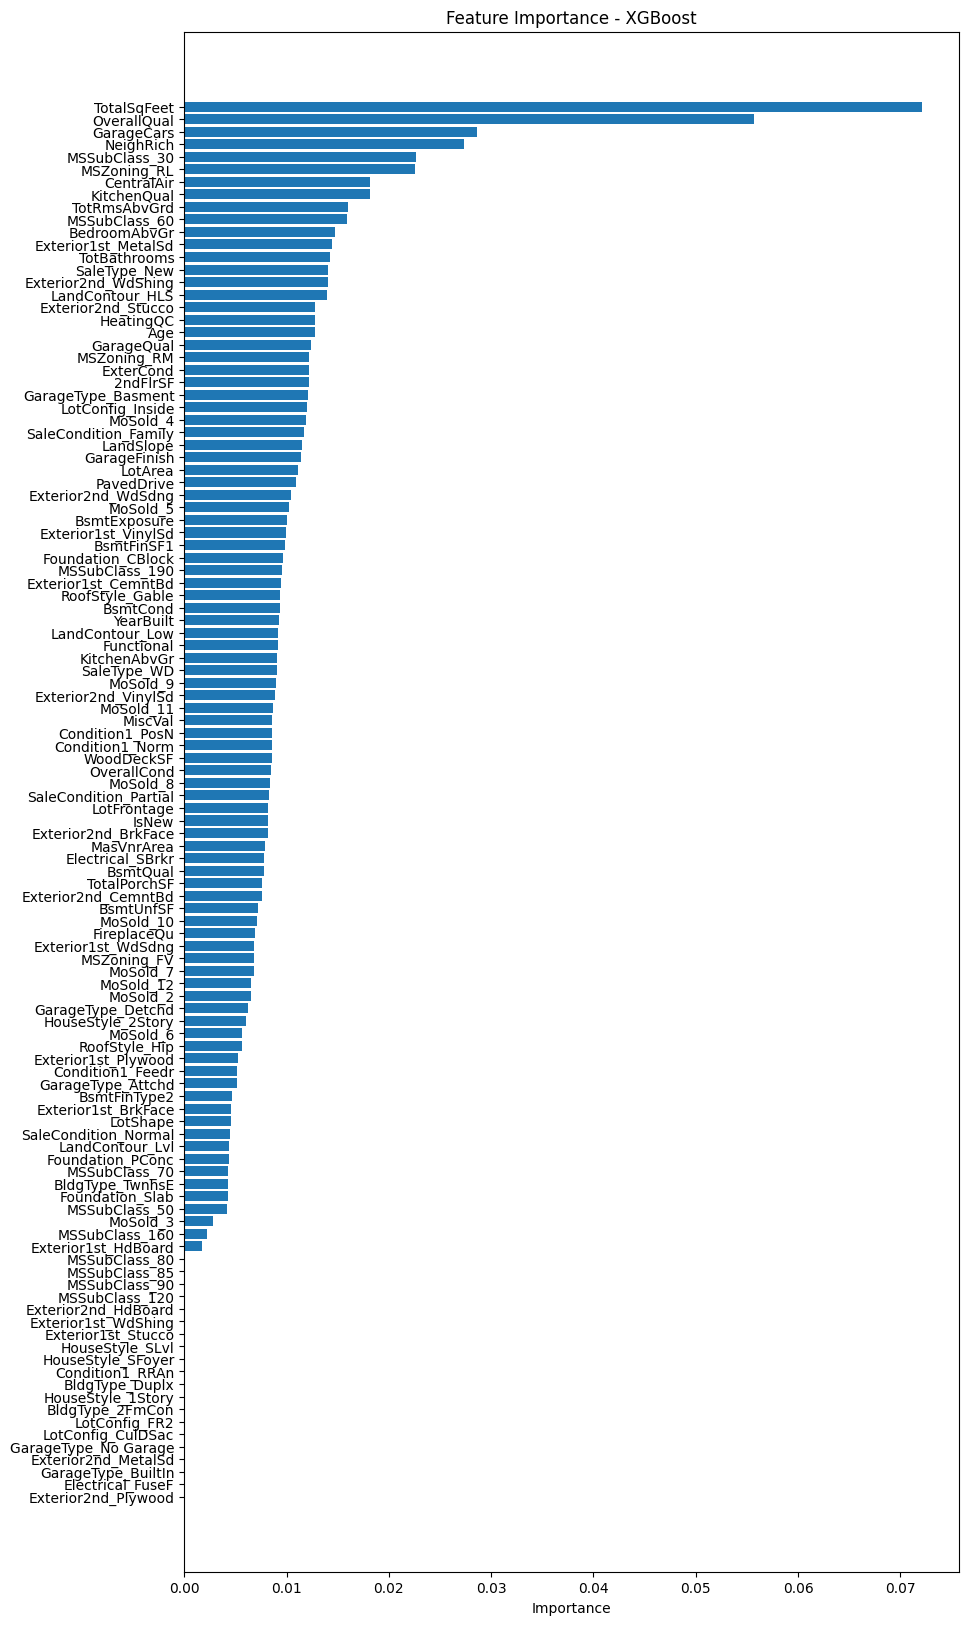

In [ ]:
importance = xgb_model.feature_importances_

feat_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': importance
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 20))
plt.barh(feat_importance['Feature'], feat_importance['Importance'])
plt.gca().invert_yaxis()  # щоб найважливіші були зверху
plt.xlabel("Importance")
plt.title("Feature Importance - XGBoost")
plt.show()

In [ ]:
lasso = Lasso(alpha=0.001, max_iter=10000, random_state=42)  # alpha можна тюнити
lasso.fit(X_train, y_train)


y_pred_train = lasso.predict(X_train)
y_pred_test  = lasso.predict(X_test)


rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
rmse_test  = np.sqrt(mean_squared_error(y_test, y_pred_test))

r2_train = r2_score(y_train, y_pred_train)
r2_test  = r2_score(y_test, y_pred_test)

print(f"Train RMSE: {rmse_train:.3f}, R²: {r2_train:.3f}")
print(f"Test  RMSE: {rmse_test:.3f}, R²: {r2_test:.3f}")

Train RMSE: 0.202, R²: 0.532
Test  RMSE: 0.198, R²: 0.510


In [ ]:
X_train_bias = np.hstack([np.ones((X_train.shape[0], 1)), X_train])
X_test_bias  = np.hstack([np.ones((X_test.shape[0], 1)), X_test])

# Обчислюємо коефіцієнти через pseudo-inverse
beta = np.linalg.pinv(X_train_bias) @ y_train

y_pred_train = X_train_bias @ beta
y_pred_test  = X_test_bias  @ beta

rmse_train = np.sqrt(np.mean((y_train - y_pred_train)**2))
rmse_test  = np.sqrt(np.mean((y_test - y_pred_test)**2))

r2_train = 1 - np.sum((y_train - y_pred_train)**2) / np.sum((y_train - np.mean(y_train))**2)
r2_test  = 1 - np.sum((y_test - y_pred_test)**2) / np.sum((y_test - np.mean(y_test))**2)

print(f"Train RMSE: {rmse_train:.3f}, R²: {r2_train:.3f}")
print(f"Test  RMSE: {rmse_test:.3f}, R²: {r2_test:.3f}")

Train RMSE: 0.199, R²: 0.547
Test  RMSE: 0.204, R²: 0.483
